Start off by importing standard Python libraries that are used in creating Machine Learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the contents of the csv file
df = pd.read_csv('archive/traffic_accidents.csv')

Get information about the dataset, including its size, info about its contents and more. 

In [3]:
df.shape

(8756, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 684.2 KB


In [5]:
df.describe()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.446209,5.013598,0.507557,2.479631,0.694381,24.952034,1.501943,50.697515,12.001447
std,5.228151,2.595933,2.886880,0.287580,1.434957,0.460695,14.433671,0.860790,28.578973,6.867289
min,5.000000,1.000100,0.000500,0.000000,0.000000,0.000000,0.004700,0.000000,1.026700,0.003100
25%,17.000000,3.190900,2.521600,0.260800,1.229850,0.000000,12.307675,0.774225,25.956750,6.050650
50%,21.000000,5.428500,5.023450,0.509250,2.484300,1.000000,25.009100,1.496950,51.279950,12.013700
75%,24.000000,7.675675,7.543050,0.752125,3.695100,1.000000,37.448300,2.248625,75.714075,17.951825
max,35.000000,9.997500,9.999200,0.999900,4.998900,1.000000,49.997800,2.999800,99.962300,23.997000


nunique is good for identifing categorical data that may be shown in numeric form,

In [6]:
df.nunique()

accidents                31
traffic_fine_amount    8332
traffic_density        8394
traffic_lights         5903
pavement_quality       8017
urban_area                2
average_speed          8680
rain_intensity         7623
vehicle_count          8717
time_of_day            8600
dtype: int64

No null values to take care of. If needed, .dropna or .interpolate could have been used here.

In [7]:
df.isnull().sum()

accidents              0
traffic_fine_amount    0
traffic_density        0
traffic_lights         0
pavement_quality       0
urban_area             0
average_speed          0
rain_intensity         0
vehicle_count          0
time_of_day            0
dtype: int64

Seperate the data into categorical and numerical values. 

In [11]:
cats = df.select_dtypes(include='object')
nums = df.select_dtypes(include='number')

In [12]:
cats.head()

""
0
1
2
3
4


In [13]:
nums.head()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
0,20,4.3709,2.3049,0.0753,0.7700,1,32.1592,1.1944,29.0857,16.0432
1,11,9.5564,3.2757,0.5452,4.0540,1,47.8623,0.6296,93.1812,8.9108
2,19,7.5879,2.0989,0.6697,0.3450,0,36.4476,2.8584,83.0086,5.5727
3,23,6.3879,4.9188,0.9412,0.4729,0,20.9200,2.1065,81.3159,13.1452
4,23,2.4042,0.1961,0.7393,1.7111,1,37.3780,1.7028,1.4663,0.6961


Accidents will be the target variable

In [15]:
X = df.drop(columns='accidents')
y = df['accidents']

Plot the features in numerical data to identify potential categoricals and visualize relationships between variables

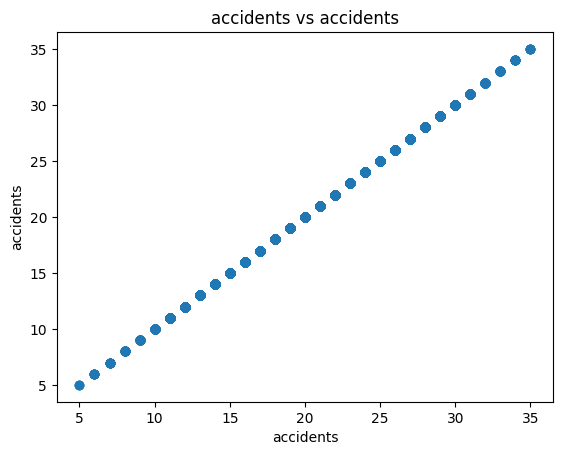

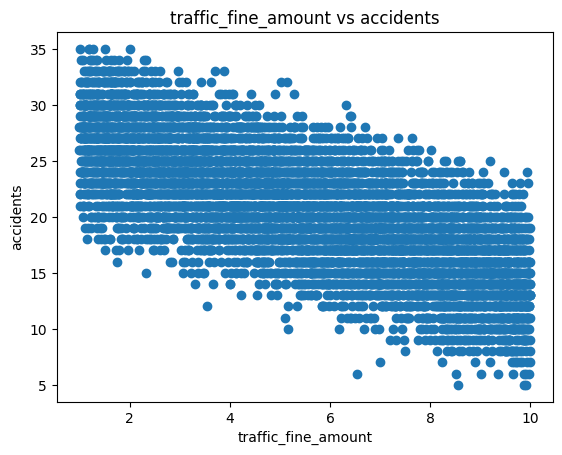

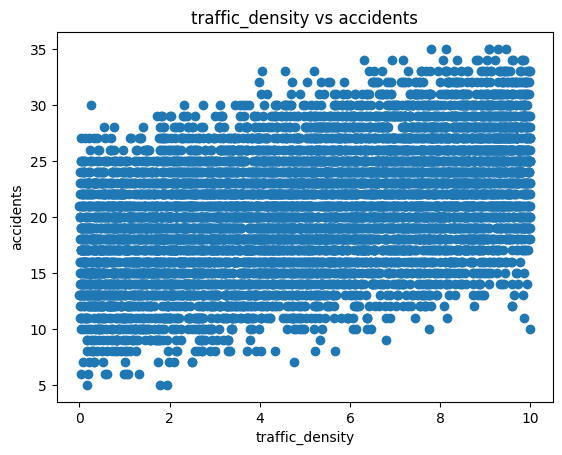

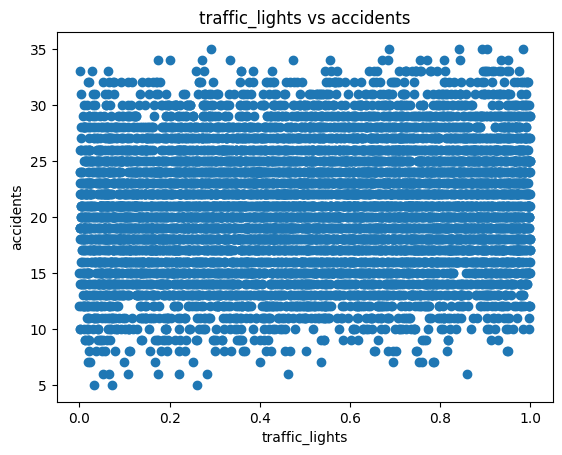

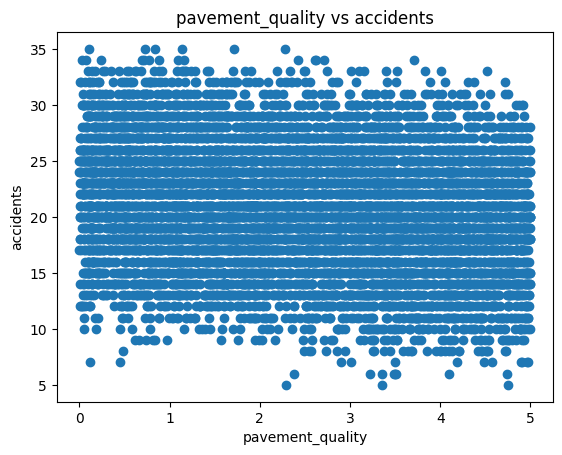

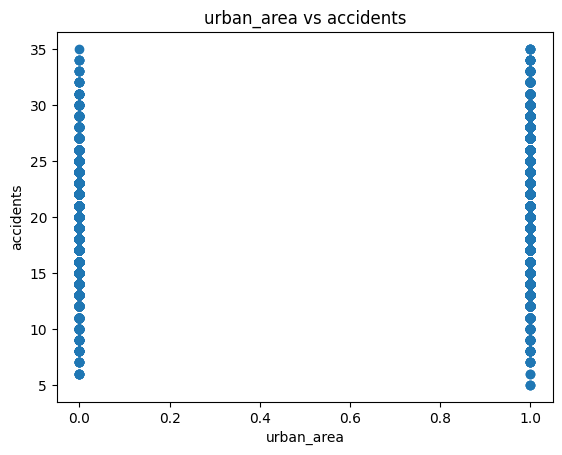

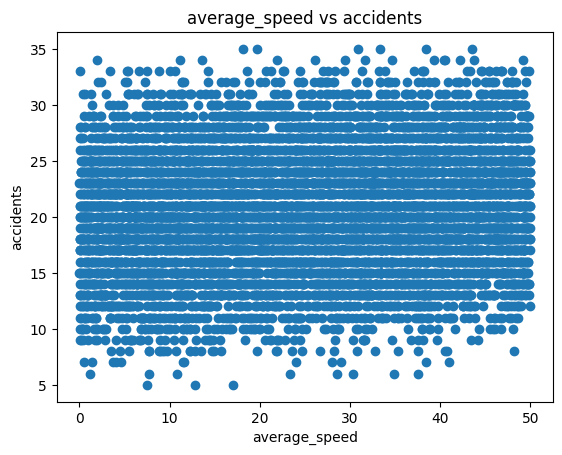

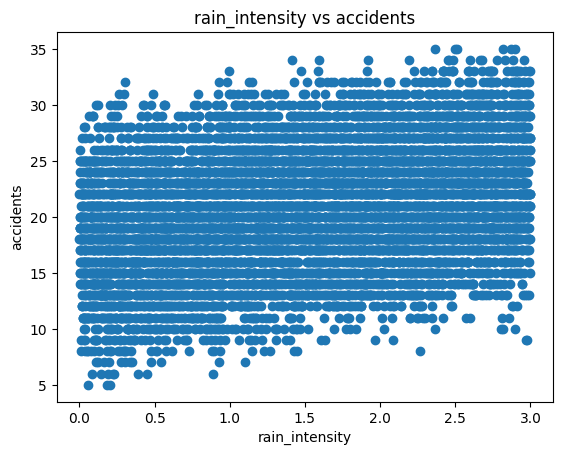

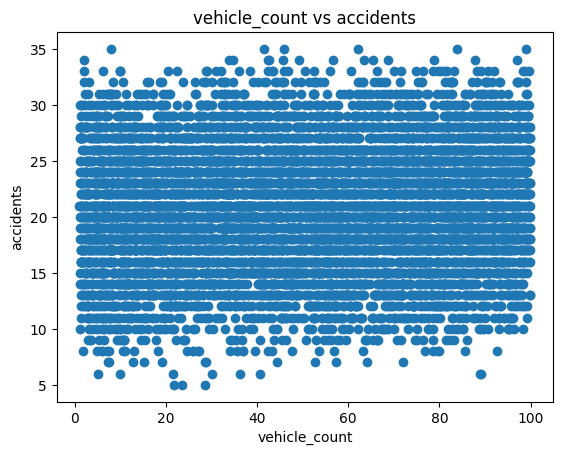

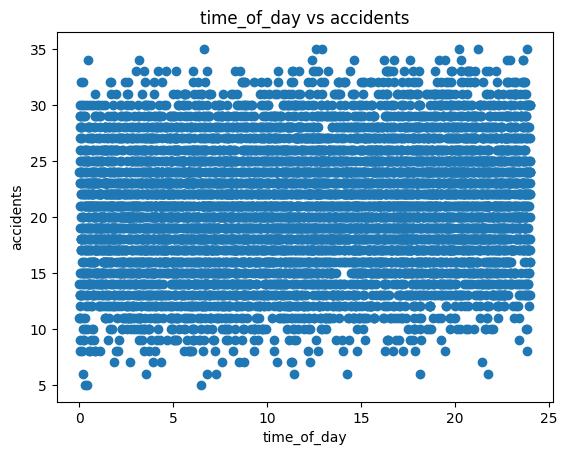

In [16]:
for l in nums:
    plt.scatter(df[l], df['accidents'])
    plt.xlabel(l)
    plt.ylabel('accidents')
    plt.title(f'{l} vs accidents')
    plt.show()

Urban area is clearly a categorical column, therefore seperate it from the others. 

In [28]:
cats ['urban_area'] = df['urban_area'].astype(str)
nums.drop(columns='accidents', inplace=True)

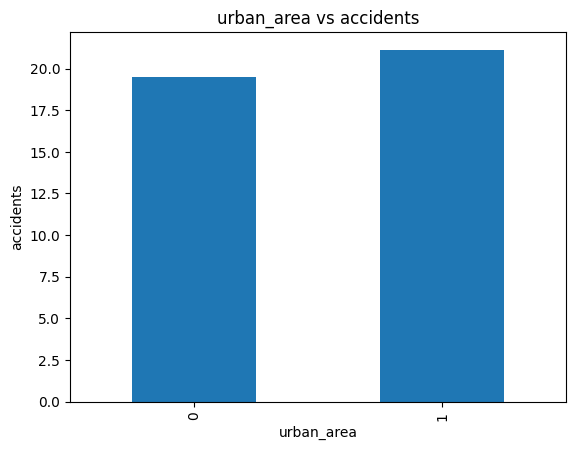

In [34]:
for k in cats:
    if k != 'accidents':
        df.groupby([k])['accidents'].mean().plot.bar()
        plt.title(f'{k} vs accidents')
        plt.ylabel('accidents')
        plt.show()

In [29]:
cats.head()

,urban_area
0,1
1,1
2,0
3,0
4,1


In [30]:
nums.head()

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,average_speed,rain_intensity,vehicle_count,time_of_day
0,4.3709,2.3049,0.0753,0.7700,32.1592,1.1944,29.0857,16.0432
1,9.5564,3.2757,0.5452,4.0540,47.8623,0.6296,93.1812,8.9108
2,7.5879,2.0989,0.6697,0.3450,36.4476,2.8584,83.0086,5.5727
3,6.3879,4.9188,0.9412,0.4729,20.9200,2.1065,81.3159,13.1452
4,2.4042,0.1961,0.7393,1.7111,37.3780,1.7028,1.4663,0.6961


Encode the categorical columns

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in cats.columns:
    df[l] = le.fit_transform(df[l])

The numerical data needs to be scaled in order to prevent bias towards certain larger data columns. 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nums_scaled = scaler.fit_transform(nums)
nums_scaled = pd.DataFrame(nums_scaled, columns = nums.columns)
nums_scaled.head()

,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,average_speed,rain_intensity,vehicle_count,time_of_day
0,-0.414252,-0.938332,-1.503171,-1.191484,0.499359,-0.357300,-0.756257,0.588585
1,1.583410,-0.602033,0.130905,1.097216,1.587370,-1.013479,1.486621,-0.450079
2,0.825065,-1.009694,0.563853,-1.487677,0.796486,1.575917,1.130654,-0.936194
3,0.362777,-0.032839,1.507994,-1.398540,-0.279365,0.702368,1.071422,0.166560
4,-1.171904,-1.668851,0.805887,-0.535608,0.860950,0.233354,-1.722736,-1.646355


Use anova scores to identify the columns that are most related towards the target vector.

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k='all')
nums_new = selector.fit_transform(nums_scaled, y)
anova_scores = pd.DataFrame({'Feature': nums_scaled.columns, 'Anova': selector.scores_})
anova_scores.sort_values('Anova', ascending=False)

,Feature,Anova
0,traffic_fine_amount,375.453717
1,traffic_density,73.826048
5,rain_intensity,36.100609
3,pavement_quality,14.738465
4,average_speed,5.970876
7,time_of_day,5.454393
2,traffic_lights,4.492863
6,vehicle_count,1.824390


Select the most obvious features to create the model with in terms of their respective anova scores.

In [ ]:
Final_nums = nums_scaled[['traffic_fine_amount', 'traffic_density', 'rain_intensity', 'pavement_quality']]
Final_nums.head()

,traffic_fine_amount,traffic_density,rain_intensity,pavement_quality
0,-0.414252,-0.938332,-0.357300,-1.191484
1,1.583410,-0.602033,-1.013479,1.097216
2,0.825065,-1.009694,1.575917,-1.487677
3,0.362777,-0.032839,0.702368,-1.398540
4,-1.171904,-1.668851,0.233354,-0.535608


In [40]:
Final_cats = df['urban_area']
Final_cats.head()
Final_cats.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8756 entries, 0 to 8755
Series name: urban_area
Non-Null Count  Dtype
--------------  -----
8756 non-null   int64
dtypes: int64(1)
memory usage: 68.5 KB


In [41]:
X = pd.concat([Final_nums, Final_cats], axis=1)
X.head()

,traffic_fine_amount,traffic_density,rain_intensity,pavement_quality,urban_area
0,-0.414252,-0.938332,-0.357300,-1.191484,1
1,1.583410,-0.602033,-1.013479,1.097216,1
2,0.825065,-1.009694,1.575917,-1.487677,0
3,0.362777,-0.032839,0.702368,-1.398540,0
4,-1.171904,-1.668851,0.233354,-0.535608,1


In [42]:
y.head()

0    20
1    11
2    19
3    23
4    23
Name: accidents, dtype: int64

Create a simple LinearRegression Model.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Evaluate the model

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
pred = lr.predict(X_test)
print('R2 Score:', r2_score(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))

R2 Score: 0.9093414761396246
MSE: 2.465009132410129


Can use different values for the polynomial order to understand if the model may be improved using polynomial regression. 

In [48]:
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly = PolynomialFeatures(degree=deg)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
pred_poly = lr_poly.predict(X_test_poly)
print('R2 Score:', r2_score(y_test, pred_poly))
print('MSE:', mean_squared_error(y_test, pred_poly))

R2 Score: 0.908974662555841
MSE: 2.47498280940614
